# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings 
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_claim=pd.read_csv('auto_insurance_claims_amount.csv')
df_claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize,529.881344
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02-03-2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,02-10-2011,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,Four-Door Car,Medsize,198.234764
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,02-12-2011,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,Four-Door Car,Medsize,379.200000
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,02-06-2011,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,Four-Door Car,Medsize,790.784983
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,02-03-2011,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,Four-Door Car,Large,691.200000


# EXPLORATORY DATA ANALYSIS

In [3]:
df_claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize,529.881344
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02-03-2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize,138.130879


In [4]:
df_claim.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,02-10-2011,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,Four-Door Car,Medsize,198.234764
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,02-12-2011,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,Four-Door Car,Medsize,379.200000
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,02-06-2011,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,Four-Door Car,Medsize,790.784983
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,02-03-2011,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,Four-Door Car,Large,691.200000
9133,Y167826,US,MO,Missouri,261.183687,No,Extended,College,2/14/11,Unemployed,...,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,Two-Door Car,Medsize,369.600000


In [5]:
df_claim.shape

(9134, 26)

In [6]:
df_claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Vehicle Class                     object
Vehicle Size    

In [7]:
df_claim.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount'],
      dtype='object')

In [8]:
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [9]:
df_claim.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Data in all the columns appear to have normal distribution (mean very close to 50th percentile).

In [10]:
#sns.heatmap(df_claim.isnull(),annot=True)

In [11]:
df_claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
Total Claim Amount               0
dtype: int64

LABEL ENCODING

In [12]:
le=LabelEncoder()
list=['Customer','Country','State Code','State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
for val in list:
    df_claim[val]=le.fit_transform(df_claim[val].astype(str))
df_claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,600,0,1,1,276.351928,0,0,0,2/24/11,1,...,5,0,1,0,2,0,0,5,1,384.811147
1,5946,0,3,3,697.953590,0,1,0,1/31/11,4,...,42,0,8,1,5,3,0,0,1,1131.464935
2,96,0,4,4,1288.743165,0,2,0,2/19/11,1,...,38,0,2,1,5,0,0,5,1,566.472247
3,8016,0,2,2,764.586183,0,0,0,1/20/11,4,...,65,0,7,0,1,0,2,3,1,529.881344
4,2488,0,1,1,281.369258,0,0,0,02-03-2011,1,...,44,0,1,1,3,0,0,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,0,2,2,2340.598798,0,0,0,02-10-2011,1,...,89,0,2,1,3,1,3,0,1,198.234764
9130,5390,0,2,2,309.651122,1,1,1,02-12-2011,1,...,28,0,1,0,2,0,1,0,1,379.200000
9131,6688,0,2,2,816.389043,0,1,0,02-06-2011,4,...,37,3,2,0,1,0,1,0,1,790.784983
9132,7214,0,2,2,752.444244,0,1,1,02-03-2011,1,...,3,0,3,1,4,3,1,0,0,691.200000


In [13]:
df_claim.drop(df_claim.columns[[1,8]],axis=1,inplace=True)

In [14]:
df_claim.dtypes

Customer                           int32
State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Vehicle Class                      int32
Vehicle Size                       int32
Total Claim Amount               float64
dtype: object

CHECKING DATA SKEWNESS

In [15]:
df_claim.skew()

Customer                         0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Vehicle Class                    0.395146
Vehicle Size                     0.072742
Total Claim Amount               1

REMOVING DATA SKEWNESS

In [16]:
for col in df_claim.columns:
    if df_claim.skew().loc[col]>0.55:
        df_claim[col]=np.log1p(df_claim[col])
df_claim.skew()

Customer                         0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     0.578248
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.506774
Vehicle Class                    0.395146
Vehicle Size                     0.072742
Total Claim Amount              -1

CHECKING OUTLIERS

In [17]:
z=np.abs(zscore(df_claim))
print(z.shape)
print(np.where(z>3))

(9134, 24)
(array([  31,   34,   41,   45,   71,   79,   86,   92,  129,  153,  185,
        196,  243,  244,  248,  259,  274,  281,  292,  316,  327,  337,
        368,  375,  386,  403,  404,  406,  425,  444,  496,  510,  554,
        600,  601,  633,  634,  645,  664,  676,  680,  684,  702,  703,
        716,  727,  749,  755,  790,  814,  832,  856,  863,  869,  872,
        873,  888,  899,  926,  949,  982,  987, 1010, 1011, 1015, 1078,
       1088, 1109, 1113, 1139, 1166, 1179, 1200, 1212, 1221, 1237, 1238,
       1260, 1292, 1300, 1305, 1312, 1316, 1319, 1328, 1364, 1383, 1393,
       1414, 1421, 1429, 1436, 1466, 1472, 1473, 1475, 1490, 1516, 1529,
       1552, 1555, 1558, 1602, 1610, 1650, 1687, 1696, 1795, 1796, 1803,
       1809, 1812, 1819, 1850, 1852, 1858, 1858, 1859, 1861, 1881, 1907,
       1916, 1971, 1974, 1974, 1980, 2015, 2025, 2026, 2041, 2049, 2065,
       2111, 2113, 2132, 2148, 2153, 2184, 2190, 2208, 2210, 2214, 2225,
       2255, 2294, 2305, 2309, 2328, 23

In [18]:
df_final=df_claim

BOXPLOT

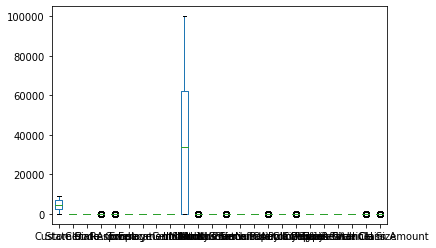

In [19]:
df_final.plot.box()

CORRELATION

In [20]:
df_final.corr()

,Customer,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
Customer,1.000000,-0.002256,-0.002256,-0.021768,0.023256,-0.007055,0.004083,0.008524,0.018435,-0.008700,...,-0.007422,-0.009882,0.005252,-0.018684,-0.016986,-0.001461,-0.008232,-0.003413,0.000412,0.007700
State Code,-0.002256,1.000000,1.000000,-0.007798,-0.001732,0.008352,0.004256,-0.003751,0.000545,0.002682,...,-0.004459,0.015200,-0.007628,-0.009102,-0.014193,0.002564,0.002662,-0.004813,-0.000956,0.003645
State,-0.002256,1.000000,1.000000,-0.007798,-0.001732,0.008352,0.004256,-0.003751,0.000545,0.002682,...,-0.004459,0.015200,-0.007628,-0.009102,-0.014193,0.002564,0.002662,-0.004813,-0.000956,0.003645
Claim Amount,-0.021768,-0.007798,-0.007798,1.000000,-0.006259,0.220307,0.029317,-0.048243,-0.011072,0.041918,...,0.001316,-0.037972,0.309314,0.018362,0.012478,-0.093169,-0.014347,0.103862,0.019862,0.156762
Response,0.023256,-0.001732,-0.001732,-0.006259,1.000000,0.000280,0.000285,-0.008671,0.004396,0.011932,...,0.002952,-0.014262,-0.028902,0.001110,-0.001461,-0.131415,-0.086607,0.021225,-0.050691,0.054391
Coverage,-0.007055,0.008352,0.008352,0.220307,0.000280,1.000000,0.022528,0.007114,-0.015726,-0.014182,...,0.009316,-0.006407,-0.017359,0.002766,-0.001198,-0.044662,-0.028655,-0.017606,-0.005661,0.182003
Education,0.004083,0.004256,0.004256,0.029317,0.000285,0.022528,1.000000,-0.028035,0.002206,0.018709,...,0.004140,-0.021060,0.008214,0.011650,0.011119,0.059085,-0.005018,0.010192,-0.005491,0.011618
EmploymentStatus,0.008524,-0.003751,-0.003751,-0.048243,-0.008671,0.007114,-0.028035,1.000000,0.040422,-0.658870,...,0.015166,0.011004,0.006709,-0.002898,0.000428,-0.110389,-0.019699,-0.005341,-0.012229,0.269979
Gender,0.018435,0.000545,0.000545,-0.011072,0.004396,-0.015726,0.002206,0.040422,1.000000,-0.015138,...,0.004198,-0.005137,0.015680,-0.002227,-0.003123,0.036928,-0.020614,0.020043,-0.000347,0.077549
Income,-0.008700,0.002682,0.002682,0.041918,0.011932,-0.014182,0.018709,-0.658870,-0.015138,1.000000,...,-0.000875,0.006318,-0.008837,0.002080,0.005032,0.146203,0.013494,0.004343,0.007945,-0.343448


PAIRPLOT

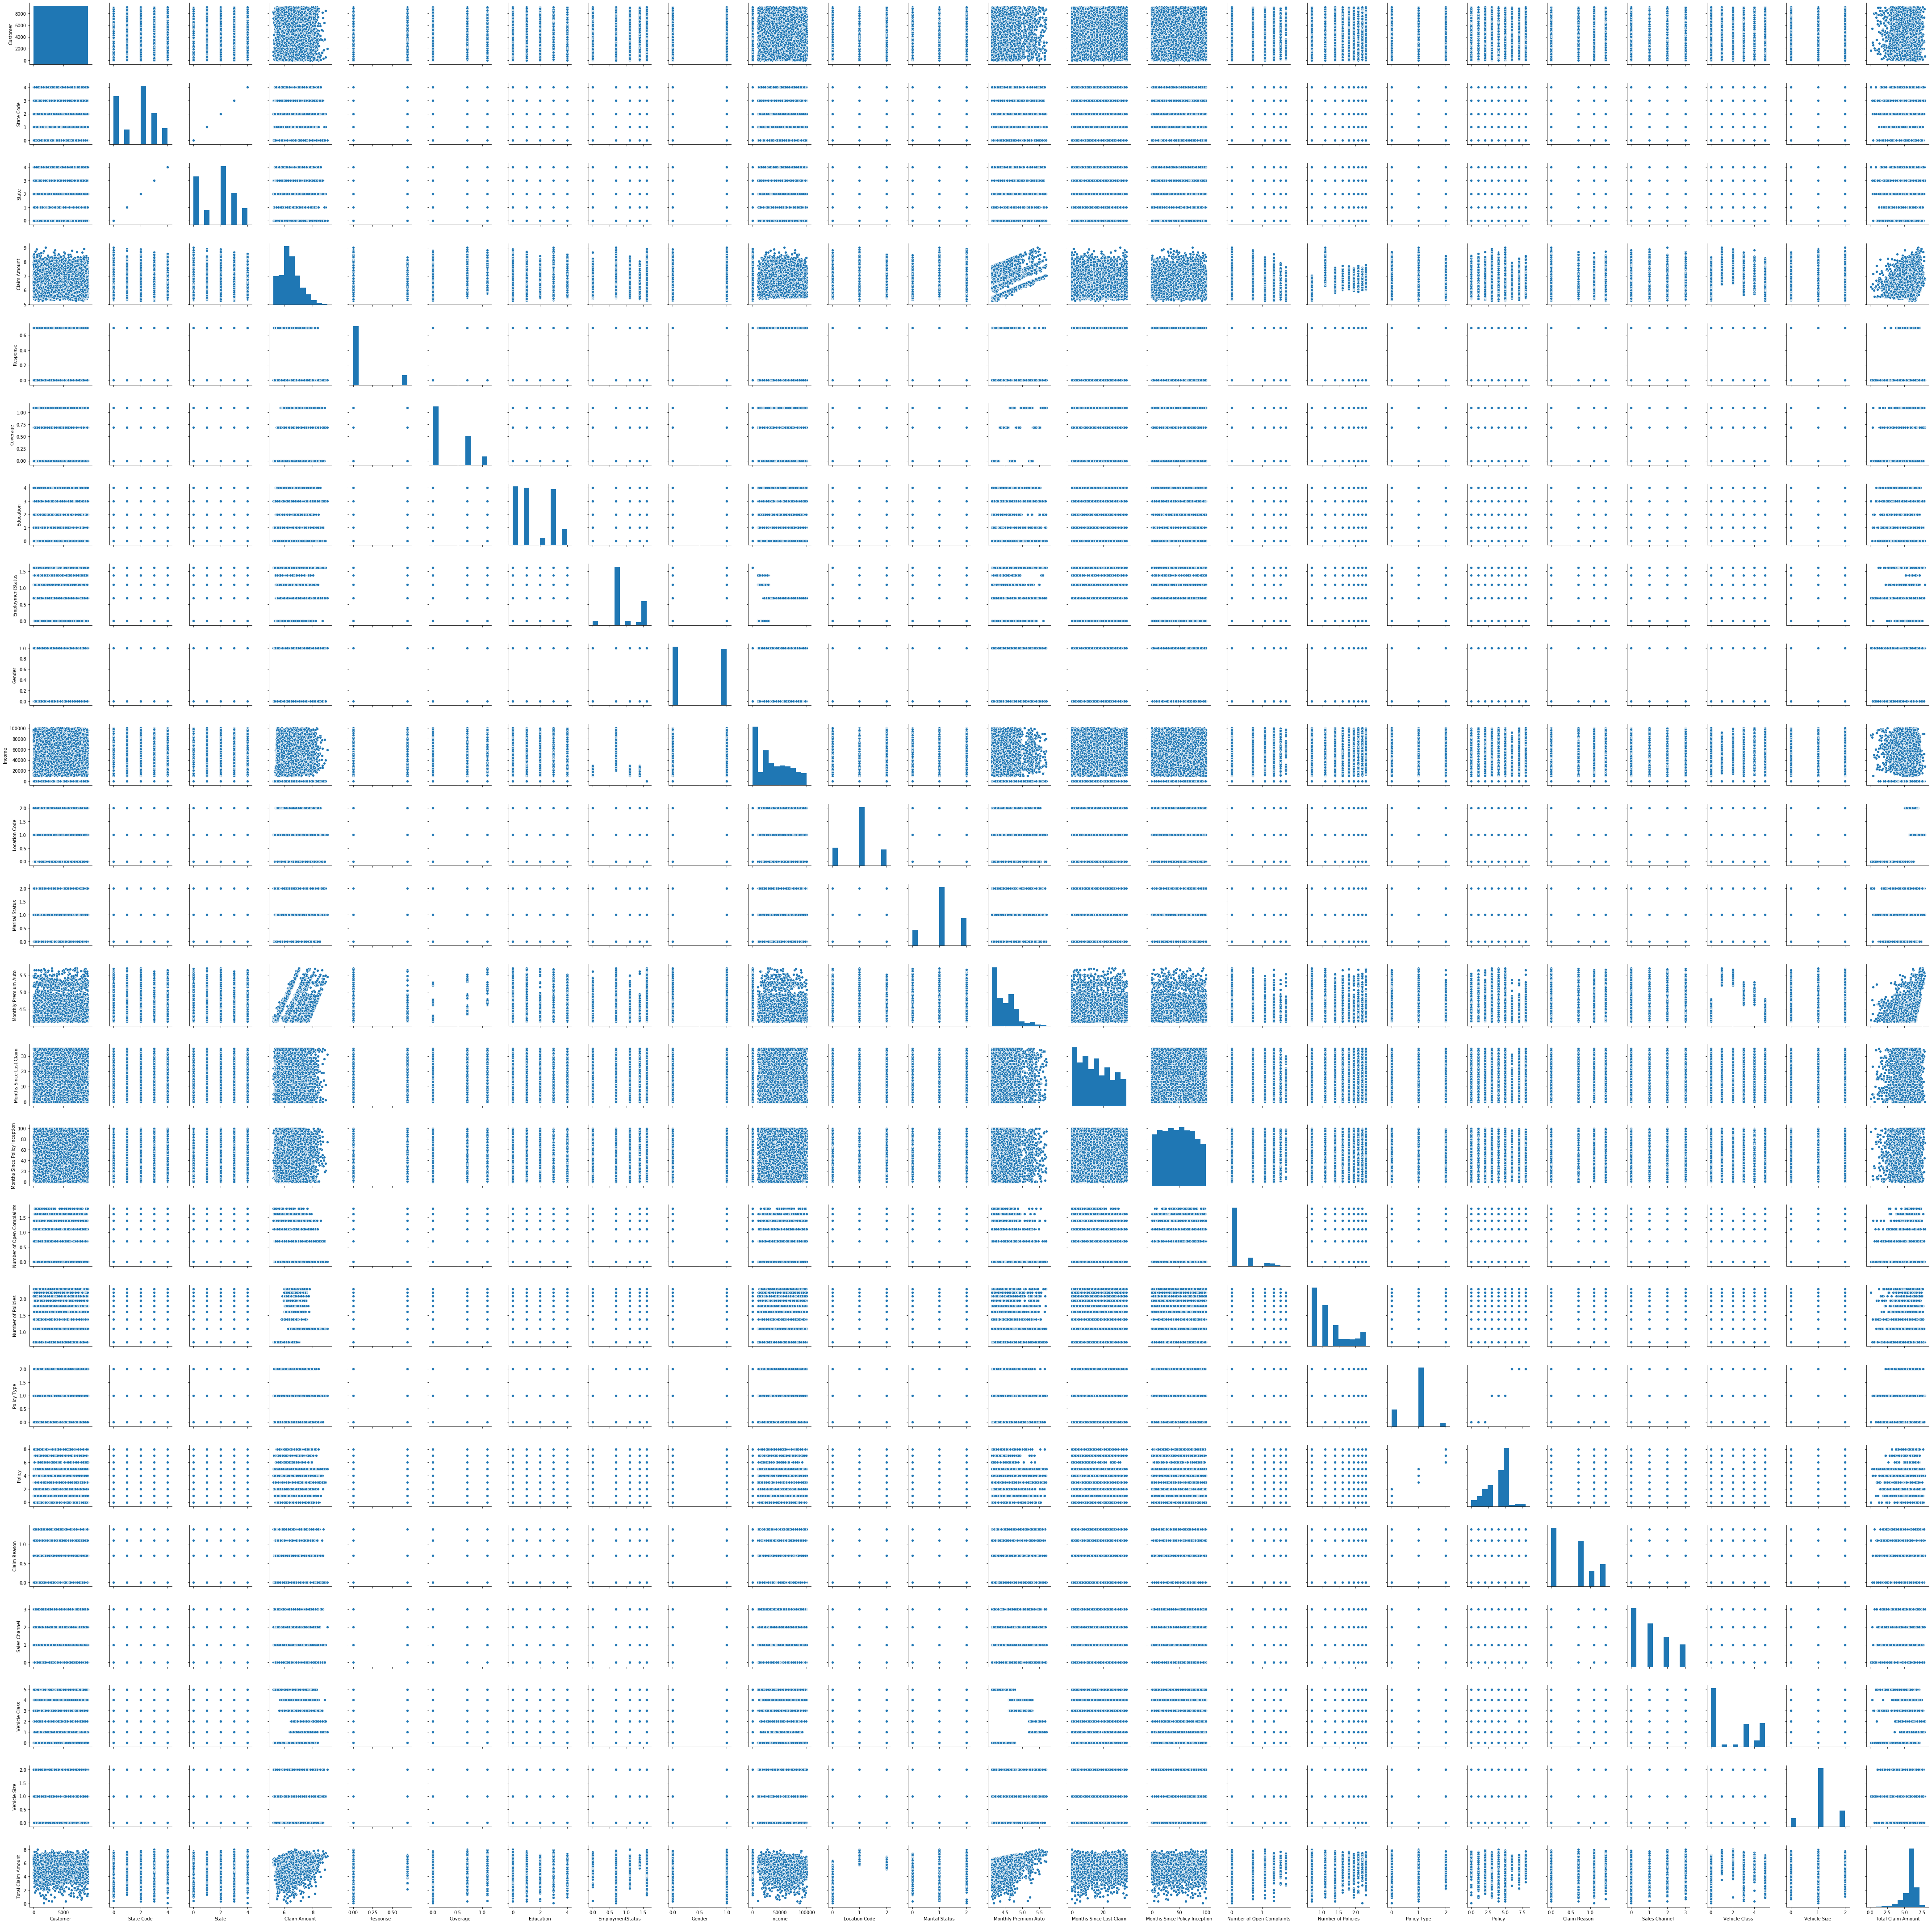

In [21]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [22]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

      Customer  State Code  State  Claim Amount  Response  Coverage  \
0          600           1      1      5.625287  0.000000  0.000000   
1         5946           3      3      6.549584  0.000000  0.693147   
2           96           4      4      7.162198  0.000000  1.098612   
3         8016           2      2      6.640642  0.000000  0.000000   
4         2488           1      1      5.643216  0.000000  0.000000   
...        ...         ...    ...           ...       ...       ...   
9129      3857           2      2      7.758589  0.000000  0.000000   
9130      5390           2      2      5.738670  0.693147  0.693147   
9131      6688           2      2      6.706115  0.000000  0.693147   
9132      7214           2      2      6.624655  0.000000  0.693147   
9133      8434           2      2      5.569045  0.000000  0.693147   

      Education  EmploymentStatus  Gender  Income  ...  \
0             0          0.693147       0   56274  ...   
1             0          1.6094

In [23]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [24]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [25]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.5090595878502829
R2 Score corresponding to  43  is  0.47631623679751356
R2 Score corresponding to  44  is  0.5202263841420711
R2 Score corresponding to  45  is  0.509276578442135
R2 Score corresponding to  46  is  0.5180734511212657
R2 Score corresponding to  47  is  0.5264372112002669
R2 Score corresponding to  48  is  0.5107675254378609
R2 Score corresponding to  49  is  0.5043596237052368
R2 Score corresponding to  50  is  0.5097819491865434
R2 Score corresponding to  51  is  0.5201314134875483
R2 Score corresponding to  52  is  0.5107645188178958
R2 Score corresponding to  53  is  0.5191791285871606
R2 Score corresponding to  54  is  0.5151924552229624
R2 Score corresponding to  55  is  0.5305337410062972
R2 Score corresponding to  56  is  0.49099148287499994
R2 Score corresponding to  57  is  0.5090100401335425
R2 Score corresponding to  58  is  0.5096189614811434
R2 Score corresponding to  59  is  0.5090384055946284
R2 Score corresponding to  

In [26]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.5085526414412791
Standard Deviation in R2 Score for Linear Regression is  0.012751373516487056


KNEIGHBORS REGRESSOR

In [27]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 29}

In [28]:
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.08975693314068178
R2 Score corresponding to  43  is  0.09652603603987175
R2 Score corresponding to  44  is  0.07838362359611217
R2 Score corresponding to  45  is  0.1074685517578996
R2 Score corresponding to  46  is  0.08128358392629809
R2 Score corresponding to  47  is  0.10197778942357816
R2 Score corresponding to  48  is  0.08703507331002924
R2 Score corresponding to  49  is  0.088318571539589
R2 Score corresponding to  50  is  0.10745961195169518
R2 Score corresponding to  51  is  0.10686523164590123
R2 Score corresponding to  52  is  0.08378150084578728
R2 Score corresponding to  53  is  0.105858445993956
R2 Score corresponding to  54  is  0.09079819773153197
R2 Score corresponding to  55  is  0.10073154069384849
R2 Score corresponding to  56  is  0.08863465770639545
R2 Score corresponding to  57  is  0.09146583481498649
R2 Score corresponding to  58  is  0.08968502985392046
R2 Score corresponding to  59  is  0.11622599160302272
R2 Score corres

In [29]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.0981256250430749
Standard Deviation in R2 Score for KNN Regression is  0.016167176028336516


LASSO REGRESSION

In [30]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [31]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.508601941843392
R2 Score corresponding to  43  is  0.4767884570790404
R2 Score corresponding to  44  is  0.5205636758570624
R2 Score corresponding to  45  is  0.509555612758105
R2 Score corresponding to  46  is  0.5180922195696338
R2 Score corresponding to  47  is  0.5270697478964705
R2 Score corresponding to  48  is  0.5111057069678691
R2 Score corresponding to  49  is  0.5039600007070706
R2 Score corresponding to  50  is  0.5103600256665416
R2 Score corresponding to  51  is  0.5202019258813118
R2 Score corresponding to  52  is  0.5108606711964951
R2 Score corresponding to  53  is  0.5192286816437994
R2 Score corresponding to  54  is  0.5153441591838257
R2 Score corresponding to  55  is  0.5306000998890401
R2 Score corresponding to  56  is  0.49063432685517994
R2 Score corresponding to  57  is  0.5091346562177512
R2 Score corresponding to  58  is  0.5097725603648047
R2 Score corresponding to  59  is  0.5091194035167438
R2 Score corresponding to  60

In [32]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.5087718035310165
Standard Deviation in R2 Score for Lasso Regression is  0.012595130615367595


RIDGE REGRESSION

In [33]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [34]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.5090586031272102
R2 Score corresponding to  43  is  0.4763401241647084
R2 Score corresponding to  44  is  0.5202212891446873
R2 Score corresponding to  45  is  0.5092605597588986
R2 Score corresponding to  46  is  0.5180276679821535
R2 Score corresponding to  47  is  0.5264098888169279
R2 Score corresponding to  48  is  0.5107701601736165
R2 Score corresponding to  49  is  0.5043298990296605
R2 Score corresponding to  50  is  0.5098141344681174
R2 Score corresponding to  51  is  0.5201088408809986
R2 Score corresponding to  52  is  0.5107610755820371
R2 Score corresponding to  53  is  0.5191893896977258
R2 Score corresponding to  54  is  0.5151703393465534
R2 Score corresponding to  55  is  0.5304902144934969
R2 Score corresponding to  56  is  0.49097823286918807
R2 Score corresponding to  57  is  0.5090424956156265
R2 Score corresponding to  58  is  0.5096169329387196
R2 Score corresponding to  59  is  0.5090267066263707
R2 Score corresponding to  

In [35]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.508557248698347
Standard Deviation in R2 Score for Ridge Regression is  0.012711163073721617


ELASTIC NET REGRESSION

In [36]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [37]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.5087952076215009
R2 Score corresponding to  43  is  0.47665414031545283
R2 Score corresponding to  44  is  0.5204516821752334
R2 Score corresponding to  45  is  0.5093638897268336
R2 Score corresponding to  46  is  0.5179211233640466
R2 Score corresponding to  47  is  0.5266792568084435
R2 Score corresponding to  48  is  0.5109527992250691
R2 Score corresponding to  49  is  0.5040606889648398
R2 Score corresponding to  50  is  0.5102167405174519
R2 Score corresponding to  51  is  0.5200912341889603
R2 Score corresponding to  52  is  0.5107867389532865
R2 Score corresponding to  53  is  0.5192495572020077
R2 Score corresponding to  54  is  0.5152415702775832
R2 Score corresponding to  55  is  0.5304496985026153
R2 Score corresponding to  56  is  0.4907503478462816
R2 Score corresponding to  57  is  0.5091654123181191
R2 Score corresponding to  58  is  0.5096936927968371
R2 Score corresponding to  59  is  0.5090398965279773
R2 Score corresponding to  

In [38]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.5086923939016922
Standard Deviation in R2 Score for Elastic Net Regression is  0.012525866256955606


GRADIENT BOOSTING REGRESSOR

In [39]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [40]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.749240760431025
R2 Score corresponding to  43  is  0.7465307605467071
R2 Score corresponding to  44  is  0.7843173683548512
R2 Score corresponding to  45  is  0.7502992132768627
R2 Score corresponding to  46  is  0.7650780142866292
R2 Score corresponding to  47  is  0.7639307734596822
R2 Score corresponding to  48  is  0.7674368717891829
R2 Score corresponding to  49  is  0.7586519498764304
R2 Score corresponding to  50  is  0.7734328094994943
R2 Score corresponding to  51  is  0.7515603402453166
R2 Score corresponding to  52  is  0.7702292172865933
R2 Score corresponding to  53  is  0.7606139721151265
R2 Score corresponding to  54  is  0.7532880596412455
R2 Score corresponding to  55  is  0.7646639083920794
R2 Score corresponding to  56  is  0.7545882217554978
R2 Score corresponding to  57  is  0.7474944150668492
R2 Score corresponding to  58  is  0.768112193573506
R2 Score corresponding to  59  is  0.7649338730818723
R2 Score corresponding to  60 

In [41]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.760740678860694
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.013561375867608218


# BEST MODEL

R2 SCORE AND RMSE

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.7885768827840325
RMSE is  0.4064741148678155


CROSS VALIDATION

In [43]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.74247809 0.76616054 0.74738644 0.78158752 0.76582544]
Mean Score is  0.7606876019390226
Standard Deviation is  0.014153898845309773


# PICKLE

In [44]:
joblib.dump(gbr,'claim.pkl')

['claim.pkl']